In [159]:
from sklearn.datasets import fetch_openml
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.svm import SVR,SVC,NuSVC
import cv2
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from IPython import display
from sklearn.manifold import TSNE

%matplotlib inline


## Выводы:
В обоих случаях лучше всего работает модель, в которой используется только HOG_feature_vector. По большому счету в нашем случае HOG служит не для увеличения размерности, а для уменьшения. В случае определения наличия на снимке автомобиля лучше всего использовать изображение в оттенках серого

## 1 задание

In [171]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]


In [8]:
X

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0            0  ...         0         0         0         0         0   
1            0  ...         0         0         0         0         0   
2            0  ...         0         0         0         0         0   
3            0  ...         0         0         0         0         0   
4            0  ...         0         0         0         0         0   
...        ...  ...       ...       ...       ...       ...       ...   
69995        0  ...         0         0         0         0         0   
69996        0  ...         0         0         0         0         0   
69997        0  ...         0         0         0         0         0   
69998        0  ...         0         0         0         0         0   
69999        0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
69995         0         0         0         0         0  
69996         0         0         0         0         0  
69997         0         0         0         0         0  
69998         0         0         0         0         0  
69999         0         0         0         0         0  

[70000 rows x 784 columns]

In [9]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

## Без HOG

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [185]:
model = SVC(kernel='rbf', gamma='scale', C=5.0)

In [186]:
model.fit(X_train.head(500),y_train.head(500))

SVC(C=5.0)

In [187]:
pred = model.predict(X_train.head(1000).tail(500))

In [188]:
print(classification_report(y_train.head(1000).tail(500), pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.89      0.98      0.94        59
           2       0.89      0.88      0.88        56
           3       0.89      0.86      0.88        49
           4       0.85      0.91      0.88        43
           5       0.88      0.82      0.85        45
           6       0.91      0.89      0.90        47
           7       0.96      0.83      0.89        52
           8       0.84      0.89      0.86        54
           9       0.83      0.87      0.85        52

    accuracy                           0.89       500
   macro avg       0.89      0.88      0.89       500
weighted avg       0.89      0.89      0.89       500



1000


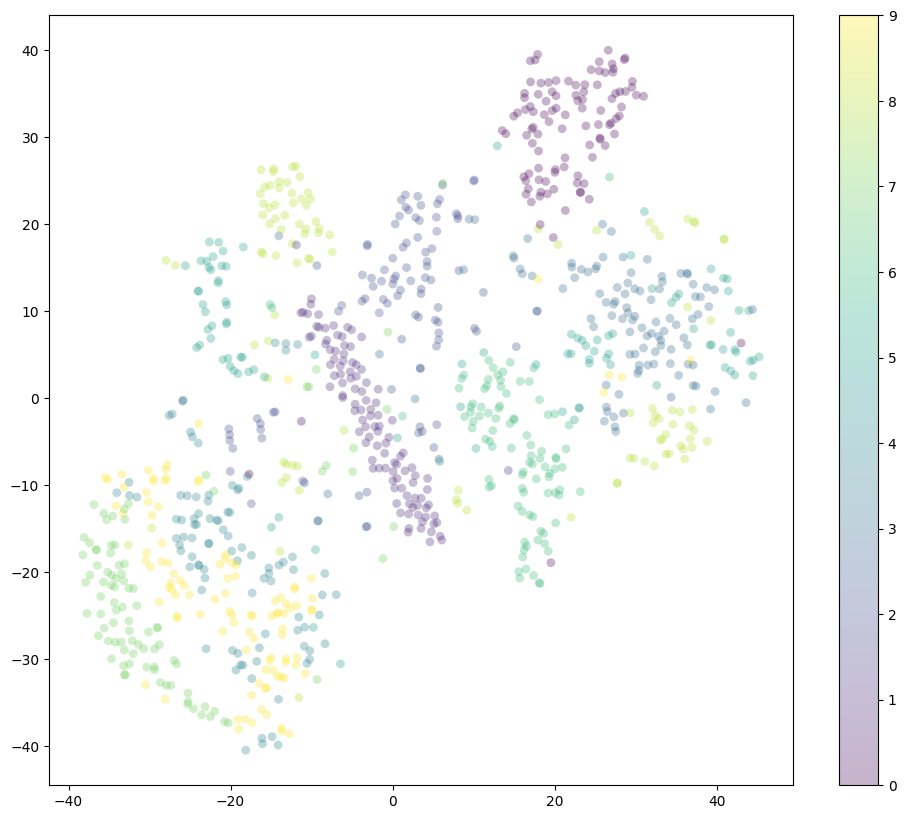

In [211]:
tsne = TSNE(n_components=2)
X_train = X_train.head(1000)
y_train = y_train.head(1000)
print(y_train.shape[0])
X_reduced = tsne.fit_transform(X_train)

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=[int(i) for i in y_train], 
            edgecolor='none', alpha=0.3, s=40)
plt.colorbar()
plt.show()

(28, 28)


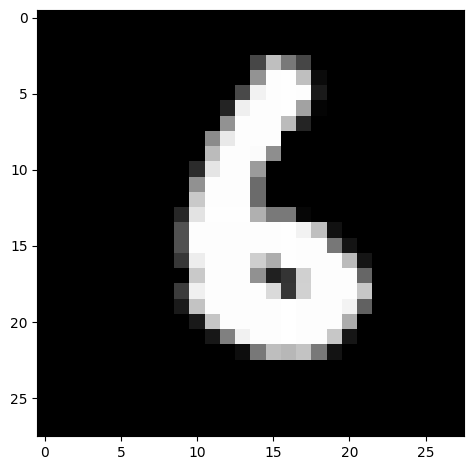

In [18]:


#reading the image
img = (np.array(X.iloc[36]).reshape(28,28)).astype('uint8')

imshow(img)
print(img.shape)

(64, 32)


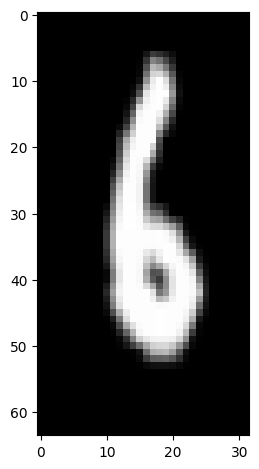

In [63]:
#resizing image 
resized_img = resize(img, (64,32)) 
imshow(resized_img) 
print(resized_img.shape)

In [64]:

#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)


In [65]:
fd.shape

(756,)

In [2]:
#fd

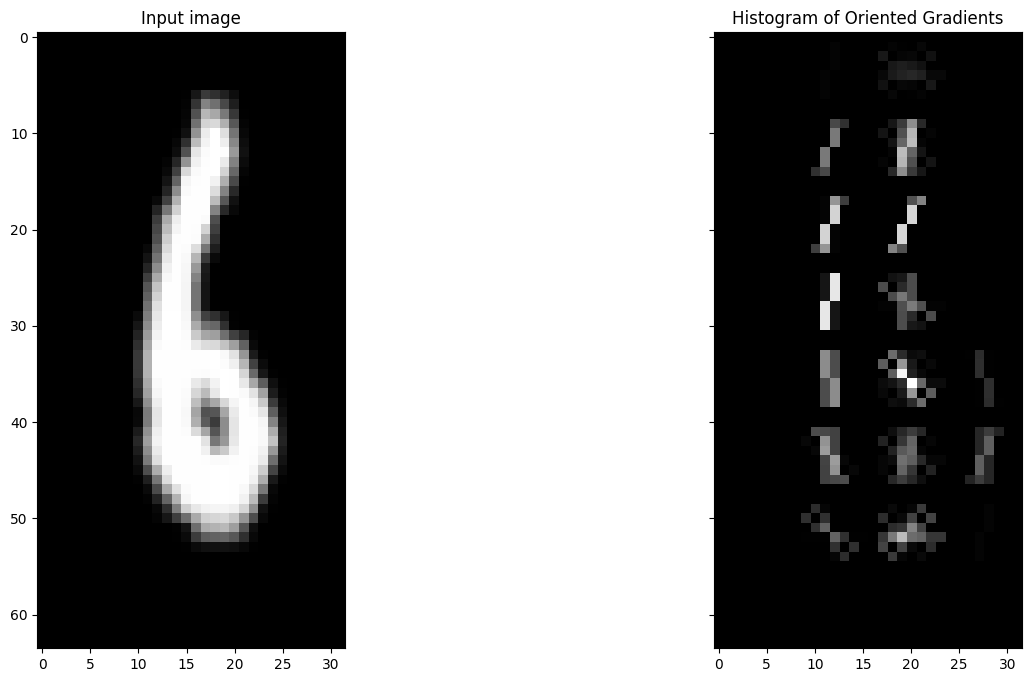

In [67]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()


## Только HOG

In [207]:
feature_vectors = []

In [208]:
for el in X_train.head(1000).values:
    img = (np.array(el).reshape(28,28)).astype('uint8')
    resized_img = resize(img, (64,32)) 
    fd,hog_img = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
    feature_vectors.append(fd)

In [26]:
model2 = SVC(kernel='rbf', gamma='scale', C=5.0)

In [27]:
model2.fit(pd.DataFrame(feature_vectors).head(500),y_train.head(500))

SVC(C=5.0)

In [28]:
pred = model2.predict(pd.DataFrame(feature_vectors).head(1000).tail(500))

In [31]:
print(classification_report(y_train.head(1000).tail(500), pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       0.98      0.98      0.98        59
           2       0.93      0.93      0.93        56
           3       0.91      0.86      0.88        49
           4       0.88      0.86      0.87        43
           5       0.93      0.89      0.91        45
           6       0.92      0.98      0.95        47
           7       0.98      0.88      0.93        52
           8       0.93      0.94      0.94        54
           9       0.88      0.94      0.91        52

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



1000


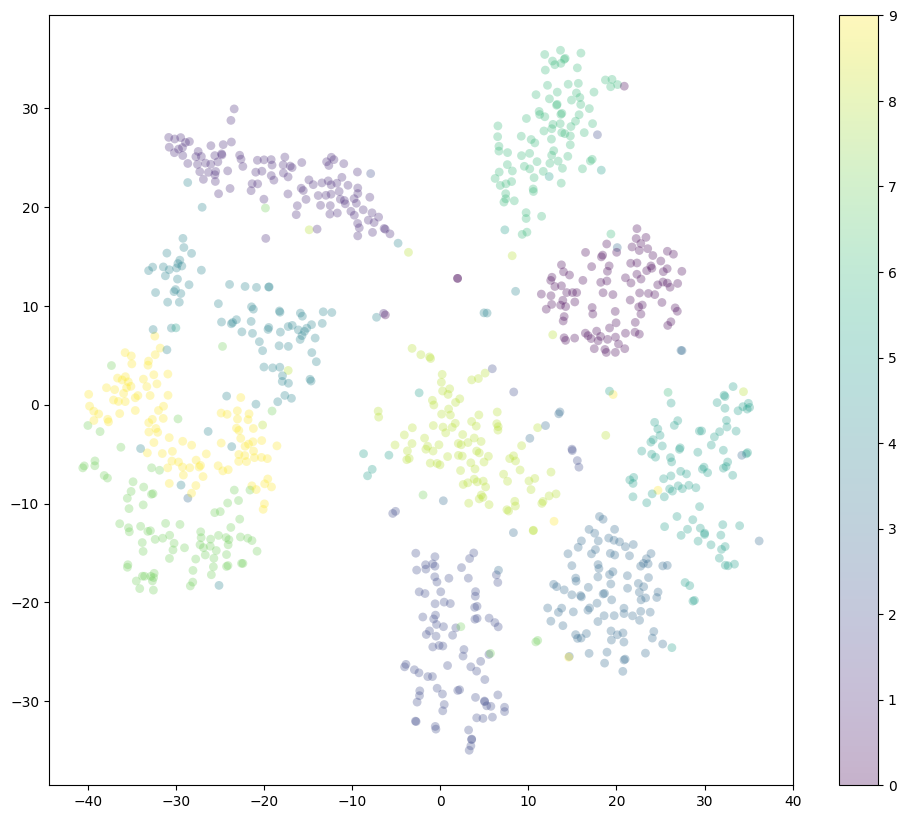

In [209]:
tsne = TSNE(n_components=2)
X_train = pd.DataFrame(feature_vectors).head(1000)
y_train = y_train.head(1000)
print(y_train.shape[0])
X_reduced = tsne.fit_transform(X_train)

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=[int(i) for i in y_train], 
            edgecolor='none', alpha=0.3, s=40)
plt.colorbar()
plt.show()

## Color_feature + HOG_feature

In [203]:
feature_vectors = []

In [204]:
for el in X_train.head(1000).values:
    img = (np.array(el).reshape(28,28)).astype('uint8')
    resized_img = cv2.resize(img, (64,32)) 
    fd,hog_img = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
    feature_vectors.append(np.concatenate((el,fd)))

In [20]:
model22 = SVC(kernel='rbf', gamma='scale', C=5.0)

In [21]:
model22.fit(pd.DataFrame(feature_vectors).head(500),y_train.head(500))

SVC(C=5.0)

In [22]:
pred = model22.predict(pd.DataFrame(feature_vectors).head(1000).tail(500))

In [23]:
print(classification_report(y_train.head(1000).tail(500), pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.89      0.98      0.94        59
           2       0.89      0.86      0.87        56
           3       0.89      0.86      0.88        49
           4       0.85      0.91      0.88        43
           5       0.88      0.82      0.85        45
           6       0.91      0.89      0.90        47
           7       0.96      0.83      0.89        52
           8       0.84      0.89      0.86        54
           9       0.82      0.87      0.84        52

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



1000


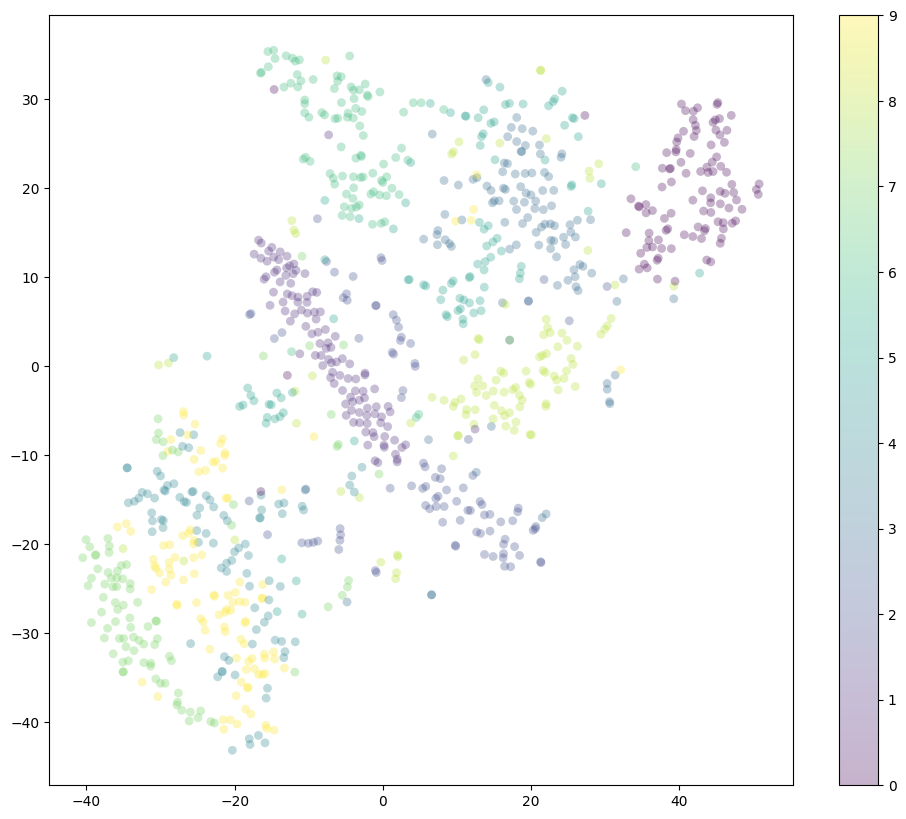

In [205]:
tsne = TSNE(n_components=2)
X_train = pd.DataFrame(feature_vectors).head(1000)
y_train = y_train.head(1000)
print(y_train.shape[0])
X_reduced = tsne.fit_transform(X_train)

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=[int(i) for i in y_train], 
            edgecolor='none', alpha=0.3, s=40)
plt.colorbar()
plt.show()

## В релультате можно сделать вывод, что выгоднее брать только HOG-feature vector

# 2 задание

## Попробуем сначала с RGB изображением, после будем рассматривать его как grayscale

In [220]:
import cv2
from pathlib import Path
p = Path('.')

In [34]:
import os
def process_images_from_folder(folder_path):
    image_vectors = []
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for file_name in file_names:
        file_path = os.path.join(folder_path, file_name)
        try:
            image = imread(file_path)
            image_vector = image.ravel()
            image_vectors.append(image_vector)
        except Exception as e:
            print(f"Ошибка при обработке файла {file_name}: {e}")
            
    return image_vectors


In [35]:
process_images_from_folder('./OwnCollection/non-vehicles/Far/')

[array([120, 132, 123, ..., 100, 111,  99], dtype=uint8),
 array([ 83,  88,  80, ..., 125, 133, 123], dtype=uint8),
 array([114, 123, 113, ..., 102, 110, 103], dtype=uint8),
 array([ 80,  77,  78, ...,  99, 109, 102], dtype=uint8),
 array([ 68,  77,  69, ...,  90, 101,  91], dtype=uint8),
 array([108, 115, 101, ..., 124, 137, 124], dtype=uint8),
 array([ 83,  93,  80, ...,  98, 109, 101], dtype=uint8),
 array([138, 157, 147, ..., 112, 123, 115], dtype=uint8),
 array([ 47,  68,  64, ..., 111, 119, 107], dtype=uint8),
 array([159, 171, 165, ..., 103, 108,  96], dtype=uint8),
 array([150, 165, 163, ..., 124, 137, 125], dtype=uint8),
 array([ 77,  78,  67, ..., 102, 109, 101], dtype=uint8),
 array([126, 145, 134, ..., 102, 115, 106], dtype=uint8),
 array([168, 180, 174, ...,  94, 102,  93], dtype=uint8),
 array([172, 192, 189, ..., 121, 129, 119], dtype=uint8),
 array([123, 138, 128, ..., 111, 121, 113], dtype=uint8),
 array([119, 127, 120, ..., 121, 129, 120], dtype=uint8),
 array([177, 1

In [349]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './OwnCollection/non-vehicles/'
res_non_vehicle = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_non_vehicle += process_images_from_folder(path_using)
res_non_vehicle

[array([120, 132, 123, ..., 100, 111,  99], dtype=uint8),
 array([ 83,  88,  80, ..., 125, 133, 123], dtype=uint8),
 array([114, 123, 113, ..., 102, 110, 103], dtype=uint8),
 array([ 80,  77,  78, ...,  99, 109, 102], dtype=uint8),
 array([ 68,  77,  69, ...,  90, 101,  91], dtype=uint8),
 array([108, 115, 101, ..., 124, 137, 124], dtype=uint8),
 array([ 83,  93,  80, ...,  98, 109, 101], dtype=uint8),
 array([138, 157, 147, ..., 112, 123, 115], dtype=uint8),
 array([ 47,  68,  64, ..., 111, 119, 107], dtype=uint8),
 array([159, 171, 165, ..., 103, 108,  96], dtype=uint8),
 array([150, 165, 163, ..., 124, 137, 125], dtype=uint8),
 array([ 77,  78,  67, ..., 102, 109, 101], dtype=uint8),
 array([126, 145, 134, ..., 102, 115, 106], dtype=uint8),
 array([168, 180, 174, ...,  94, 102,  93], dtype=uint8),
 array([172, 192, 189, ..., 121, 129, 119], dtype=uint8),
 array([123, 138, 128, ..., 111, 121, 113], dtype=uint8),
 array([119, 127, 120, ..., 121, 129, 120], dtype=uint8),
 array([177, 1

In [350]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './OwnCollection/vehicles/'
res_vehicle = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_vehicle += process_images_from_folder(path_using)
res_vehicle

[array([156, 168, 163, ..., 161, 161, 142], dtype=uint8),
 array([156, 168, 163, ..., 162, 158, 144], dtype=uint8),
 array([143, 153, 140, ..., 192, 191, 178], dtype=uint8),
 array([ 86,  99,  97, ..., 123, 130, 125], dtype=uint8),
 array([ 92, 109, 103, ..., 129, 137, 130], dtype=uint8),
 array([ 84, 100,  99, ..., 136, 145, 136], dtype=uint8),
 array([ 98, 104, 100, ..., 134, 144, 136], dtype=uint8),
 array([ 92, 106, 105, ..., 130, 140, 131], dtype=uint8),
 array([ 89,  92,  90, ..., 136, 139, 133], dtype=uint8),
 array([ 82,  87,  86, ..., 127, 135, 126], dtype=uint8),
 array([ 55,  71,  71, ..., 110, 115, 110], dtype=uint8),
 array([68, 77, 83, ..., 66, 81, 87], dtype=uint8),
 array([53, 70, 73, ..., 63, 74, 77], dtype=uint8),
 array([40, 55, 61, ..., 65, 80, 85], dtype=uint8),
 array([63, 84, 88, ..., 67, 77, 84], dtype=uint8),
 array([65, 78, 78, ..., 84, 92, 97], dtype=uint8),
 array([66, 76, 85, ..., 76, 84, 88], dtype=uint8),
 array([35, 48, 53, ..., 69, 80, 84], dtype=uint8)

In [351]:
y_non_vehicle = [0]*len(res_non_vehicle)
y_vehicle = [1]*len(res_vehicle)

In [352]:
len(res_vehicle[0])

12288

In [353]:
res_vehicle_sh = res_vehicle
np.random.shuffle(np.array(res_vehicle_sh))


In [354]:
res_non_vehicle_sh = res_non_vehicle
np.random.shuffle(np.array(res_non_vehicle_sh))


In [395]:
res_train = res_vehicle[:10000] + res_non_vehicle[:10000]
res_test = res_vehicle[-1000:] + res_non_vehicle[-1000:]

In [581]:
y_res = y_vehicle[:10000] + y_non_vehicle[:10000]
y_res_test = y_vehicle[:1000] + y_non_vehicle[:1000]

In [397]:
model3 = SVC(kernel='rbf', gamma='scale', C=5.0)

In [398]:
model3.fit(res_train,y_res)

SVC(C=5.0)

In [399]:
pred = model3.predict(res_test)

In [400]:
pred.shape

(2000,)

In [401]:
print(classification_report(y_res_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      0.99      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [567]:
model4 = SVC(kernel='rbf', gamma='scale', C=5.0)

In [ ]:
model5 = NuSVC(kernel='rbf', gamma='scale',nu = 0.3)

In [569]:
fd, hog_image = hog(image_rgb, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True,channel_axis = 2)

C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


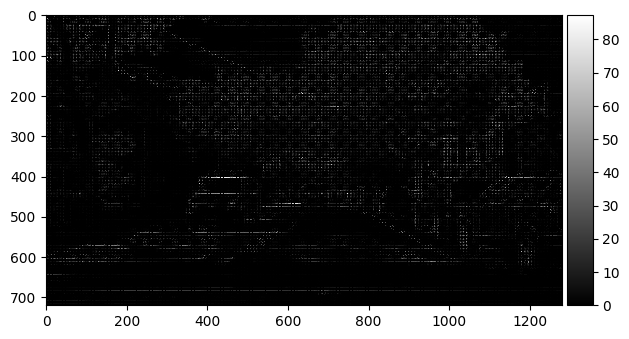

In [570]:
imshow(hog_image, cmap=plt.cm.gray) 


In [ ]:
#res_train = res_vehicle[:10000] + res_non_vehicle[:10000]
#res_test = res_vehicle[-1000:] + res_non_vehicle[-1000:]

In [50]:
def process_images_from_folder_with_HOGs(folder_path):
    image_vectors = []
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for file_name in file_names:
        file_path = os.path.join(folder_path, file_name)
        try:
            image = imread(file_path)
            image = cv2.resize(image, (64,64))
            #print(image.ravel().shape)
            fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True,channel_axis = 2)
            #d = np.concatenate(image.ravel(),fd)
            d = np.concatenate((np.array(image.ravel()),np.array(fd)))
            image_vectors.append(d)
        except Exception as e:
            print(f"Ошибка при обработке файла {file_name}: {e}")
            
    return image_vectors


In [51]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './OwnCollection/non-vehicles/'
res_non_vehicle_HOG = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_non_vehicle_HOG += process_images_from_folder_with_HOGs(path_using)
res_non_vehicle_HOG

[array([1.20000000e+02, 1.32000000e+02, 1.23000000e+02, ...,
        3.29775865e-02, 0.00000000e+00, 0.00000000e+00]),
 array([83.        , 88.        , 80.        , ...,  0.34450582,
         0.34450582,  0.17326053]),
 array([114.        , 123.        , 113.        , ...,   0.24159498,
          0.27012524,   0.27012524]),
 array([8.00000000e+01, 7.70000000e+01, 7.80000000e+01, ...,
        3.66317957e-01, 1.49129619e-01, 1.23225680e-02]),
 array([6.80000000e+01, 7.70000000e+01, 6.90000000e+01, ...,
        3.79551034e-01, 2.44330061e-02, 3.04820083e-03]),
 array([1.08000000e+02, 1.15000000e+02, 1.01000000e+02, ...,
        2.51597940e-01, 6.59391461e-02, 9.32520331e-02]),
 array([8.30000000e+01, 9.30000000e+01, 8.00000000e+01, ...,
        1.53932080e-01, 6.08470042e-02, 0.00000000e+00]),
 array([1.38000000e+02, 1.57000000e+02, 1.47000000e+02, ...,
        4.32055511e-02, 8.22603118e-02, 3.22035183e-02]),
 array([47.        , 68.        , 64.        , ...,  0.2232358 ,
         0.16

In [53]:
res_non_vehicle_HOG += process_images_from_folder_with_HOGs("./swimseg-2/train/")


In [54]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './OwnCollection/vehicles/'
res_vehicle_HOG = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_vehicle_HOG += process_images_from_folder_with_HOGs(path_using)
res_vehicle_HOG

[array([1.5600000e+02, 1.6800000e+02, 1.6300000e+02, ..., 0.0000000e+00,
        1.2660802e-02, 0.0000000e+00]),
 array([1.56000000e+02, 1.68000000e+02, 1.63000000e+02, ...,
        2.70290357e-02, 3.19077411e-02, 1.81305853e-01]),
 array([1.43000000e+02, 1.53000000e+02, 1.40000000e+02, ...,
        1.70485668e-02, 1.81495875e-02, 0.00000000e+00]),
 array([8.60000000e+01, 9.90000000e+01, 9.70000000e+01, ...,
        0.00000000e+00, 6.74293427e-02, 1.53323767e-01]),
 array([9.20000000e+01, 1.09000000e+02, 1.03000000e+02, ...,
        2.17896490e-02, 2.45075021e-02, 6.19860407e-02]),
 array([8.40000000e+01, 1.00000000e+02, 9.90000000e+01, ...,
        7.72549526e-03, 2.95748318e-02, 3.88579901e-01]),
 array([9.80000000e+01, 1.04000000e+02, 1.00000000e+02, ...,
        2.79880220e-03, 3.64470311e-02, 2.25646654e-02]),
 array([9.20000000e+01, 1.06000000e+02, 1.05000000e+02, ...,
        2.89090819e-02, 3.06026335e-02, 2.52415041e-01]),
 array([8.90000000e+01, 9.20000000e+01, 9.00000000e+01

In [55]:
len(res_vehicle_HOG)


3425

In [56]:
len(res_non_vehicle_HOG)


4761

In [57]:
np.random.shuffle(np.array(res_non_vehicle_HOG))
res_train_HOG = res_vehicle_HOG[:3400] + res_non_vehicle_HOG[:4000]
res_test_HOG = res_vehicle_HOG[-1000:] + res_non_vehicle_HOG[-1000:]

In [58]:
y_non_vehicle_HOG = [0]*len(res_non_vehicle_HOG)
y_vehicle_HOG = [1]*len(res_vehicle_HOG)

In [60]:
y_res_HOG = y_vehicle_HOG[:3400] + y_non_vehicle_HOG[:4000]
y_res_test_HOG = y_vehicle_HOG[:1000] + y_non_vehicle_HOG[:1000]

In [677]:
model5 = SVC(kernel='rbf', gamma='scale', C = 5.0,probability=True)
model5.fit(res_train_HOG,y_res_HOG)

SVC(C=5.0, probability=True)

In [61]:
model6 = SVC(kernel='rbf', gamma='scale', C = 5.0,probability=True)
model6.fit(res_train_HOG,y_res_HOG)

SVC(C=5.0, probability=True)

In [651]:
model3.fit(res_train_HOG,y_res_HOG)

SVC(C=5.0)

In [652]:
pred = model3.predict(res_test_HOG)

In [ ]:
model3.fit(res_train_HOG,y_res_HOG)

In [678]:
pred_proba = model5.predict_proba(res_test_HOG)
pred_proba


array([[6.29739526e-02, 9.37026047e-01],
       [6.18877470e-02, 9.38112253e-01],
       [1.17505480e-05, 9.99988249e-01],
       ...,
       [4.04955974e-01, 5.95044026e-01],
       [9.91616896e-01, 8.38310446e-03],
       [6.01245806e-01, 3.98754194e-01]])

In [670]:
pred5 = model5.predict(res_test_HOG)

In [671]:
print(classification_report(y_res_test_HOG, pred5))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1000
           1       0.94      0.96      0.95      1000

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [653]:
print(classification_report(y_res_test_HOG, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1000
           1       1.00      0.99      0.99      1000

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



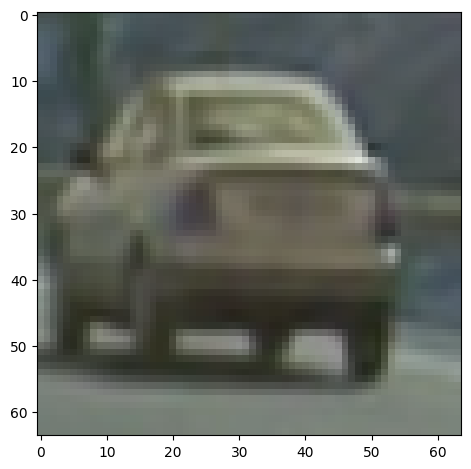

In [590]:
imshow(image)

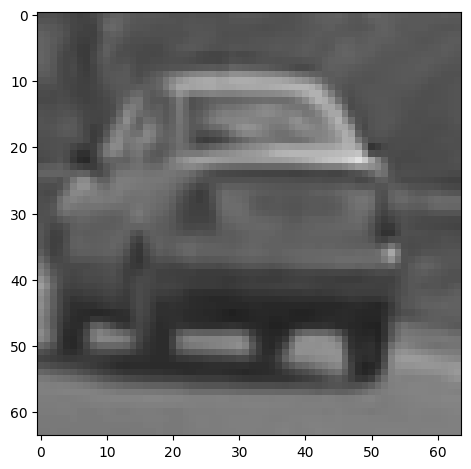

In [786]:
image = cv2.imread('./image0031.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
imshow(image)

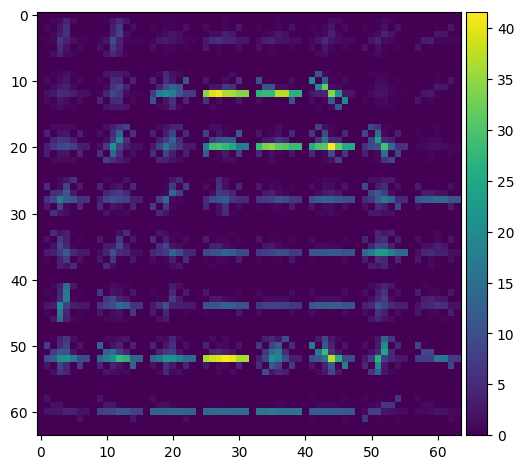

In [788]:
fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2,2), visualize=True)
imshow(hog_image)

### 

In [734]:
arr = np.zeros((10,10))
y = 1
x = 1
window_h = window_w = 3

arr[y:y + window_h, x:x + window_w]+=1
arr

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [715]:
%history -g -f 'hist_jupyter'

In [45]:
def sliding_window(image, window, step):
    for y in range(0, image.shape[0] - window[1], step):
        for x in range(0, image.shape[1] - window[0], step):
            yield (x, y, image[y:y + window[1], x:x + window[0]])

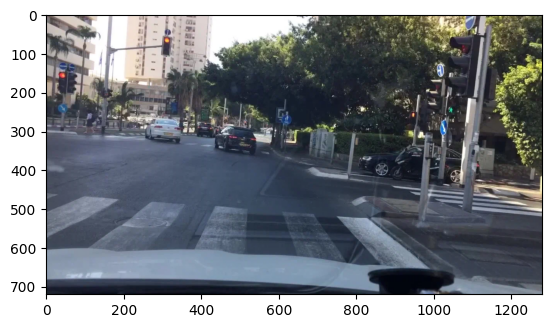

In [46]:
image = image_rgb
(window_w, window_h) = (200,200)

plt.imshow(image_rgb)



In [63]:
image_to_test = cv2.imread('./img1_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2RGB)

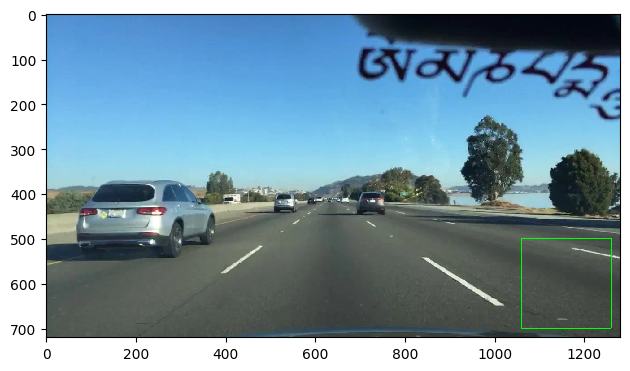

In [64]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True,channel_axis = 2)
            #d = np.concatenate(image.ravel(),fd)
    arr = np.concatenate((np.array(im.ravel()),np.array(fd)))
    
    pred = model6.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255,0,0)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0,255,0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:,::1]
    imshow(clone)
    plt.pause(0.001) 
    display.clear_output(wait=True)


C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


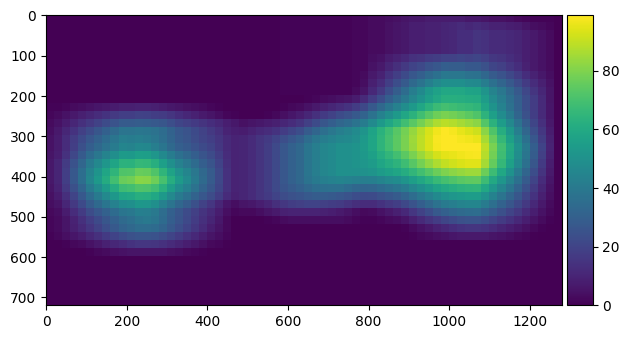

In [65]:
imshow(heatmap/10)

In [66]:
image_to_test = cv2.imread('./img2_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2RGB)

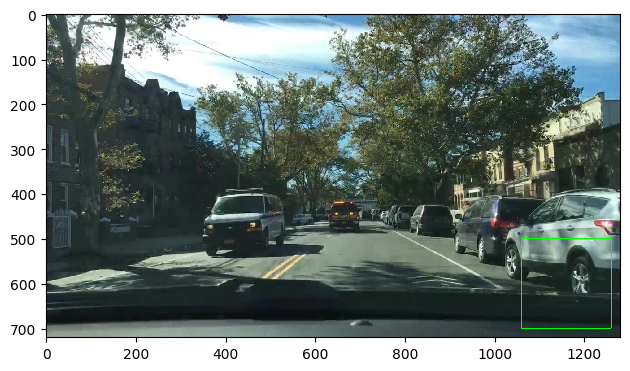

In [67]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True,channel_axis = 2)
            #d = np.concatenate(image.ravel(),fd)
    arr = np.concatenate((np.array(im.ravel()),np.array(fd)))
    
    pred = model6.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255,0,0)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0,255,0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:,::1]
    imshow(clone)
    plt.pause(0.001) 
    display.clear_output(wait=True)


C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


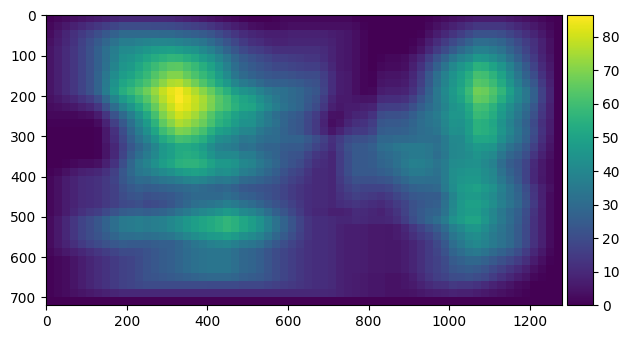

In [68]:
imshow(heatmap/10)

In [73]:
image_to_test = cv2.imread('./img3_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2RGB)


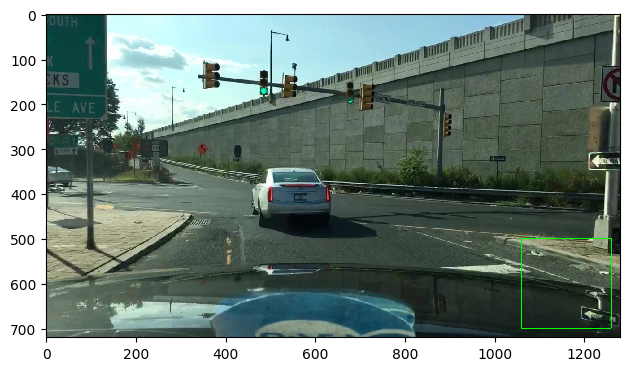

In [70]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True,channel_axis = 2)
            #d = np.concatenate(image.ravel(),fd)
    arr = np.concatenate((np.array(im.ravel()),np.array(fd)))
    
    pred = model6.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255,0,0)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0,255,0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:,::1]
    imshow(clone)
    plt.pause(0.00001) 
    display.clear_output(wait=True)


C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


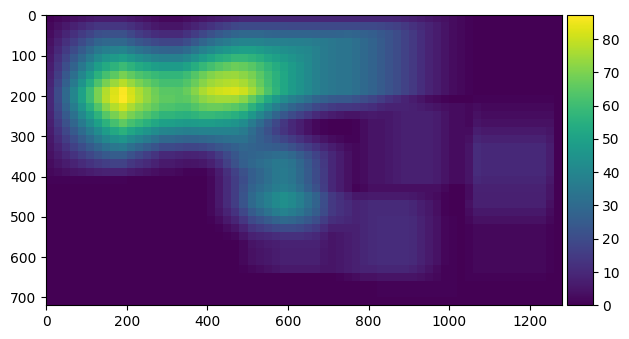

In [71]:
imshow(heatmap/10)

## Теперь попробуем в Grayscale

In [75]:
def process_images_from_folder_with_HOGs_gr(folder_path):
    image_vectors = []
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for file_name in file_names:
        file_path = os.path.join(folder_path, file_name)
        try:
            image = imread(file_path)
            image = cv2.resize(image, (64,64))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY )
            #print(image.ravel().shape)
            fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
            d = np.concatenate((np.array(image.ravel()),np.array(fd)))
            image_vectors.append(d)
        except Exception as e:
            print(f"Ошибка при обработке файла {file_name}: {e}")
            
    return image_vectors


In [76]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './OwnCollection/non-vehicles/'
res_non_vehicle_HOG = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_non_vehicle_HOG += process_images_from_folder_with_HOGs_gr(path_using)
res_non_vehicle_HOG

[array([1.27000000e+02, 1.27000000e+02, 1.27000000e+02, ...,
        7.91784609e-02, 0.00000000e+00, 0.00000000e+00]),
 array([86.        , 86.        , 90.        , ...,  0.3537819 ,
         0.3537819 ,  0.16992689]),
 array([119.        , 119.        , 121.        , ...,   0.27061085,
          0.27061085,   0.25295841]),
 array([7.80000000e+01, 8.10000000e+01, 9.30000000e+01, ...,
        3.55905443e-01, 1.54925189e-01, 3.74208312e-02]),
 array([7.30000000e+01, 7.30000000e+01, 7.50000000e+01, ...,
        3.80369303e-01, 1.09581486e-02, 8.34305321e-03]),
 array([1.11000000e+02, 1.11000000e+02, 1.11000000e+02, ...,
        5.40824326e-02, 1.42519729e-01, 0.00000000e+00]),
 array([8.90000000e+01, 8.90000000e+01, 9.00000000e+01, ...,
        2.23525905e-01, 8.83563824e-02, 0.00000000e+00]),
 array([1.50000000e+02, 1.50000000e+02, 1.49000000e+02, ...,
        1.97179553e-02, 0.00000000e+00, 0.00000000e+00]),
 array([61.        , 61.        , 61.        , ...,  0.21771356,
         0.16

In [77]:
res_non_vehicle_HOG += process_images_from_folder_with_HOGs_gr("./swimseg-2/train/")


In [78]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './OwnCollection/vehicles/'
res_vehicle_HOG = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_vehicle_HOG += process_images_from_folder_with_HOGs_gr(path_using)
res_vehicle_HOG

[array([1.64000000e+02, 1.64000000e+02, 1.63000000e+02, ...,
        0.00000000e+00, 7.71688139e-03, 4.41229568e-03]),
 array([1.64000000e+02, 1.64000000e+02, 1.63000000e+02, ...,
        1.24483203e-02, 2.35664039e-02, 9.62118948e-02]),
 array([1.49000000e+02, 1.48000000e+02, 1.44000000e+02, ...,
        8.93213570e-03, 1.65055449e-02, 7.44344675e-03]),
 array([9.50000000e+01, 9.50000000e+01, 9.50000000e+01, ...,
        6.55326971e-03, 6.33803353e-02, 1.79618829e-01]),
 array([1.03000000e+02, 1.03000000e+02, 1.04000000e+02, ...,
        2.71595670e-02, 2.82069173e-02, 1.08461578e-01]),
 array([9.50000000e+01, 9.50000000e+01, 9.90000000e+01, ...,
        7.19758317e-03, 2.50702775e-02, 3.83232665e-01]),
 array([1.02000000e+02, 1.01000000e+02, 1.00000000e+02, ...,
        1.58966952e-02, 2.82444461e-02, 2.11470830e-02]),
 array([1.02000000e+02, 1.01000000e+02, 9.80000000e+01, ...,
        1.15374926e-02, 4.65510953e-02, 2.24476185e-01]),
 array([9.10000000e+01, 9.20000000e+01, 9.200000

In [79]:
np.random.shuffle(np.array(res_non_vehicle_HOG))
res_train_HOG = res_vehicle_HOG[:3400] + res_non_vehicle_HOG[:4000]
res_test_HOG = res_vehicle_HOG[-1000:] + res_non_vehicle_HOG[-1000:]

In [80]:
y_non_vehicle_HOG = [0]*len(res_non_vehicle_HOG)
y_vehicle_HOG = [1]*len(res_vehicle_HOG)

In [81]:
y_res_HOG = y_vehicle_HOG[:3400] + y_non_vehicle_HOG[:4000]
y_res_test_HOG = y_vehicle_HOG[:1000] + y_non_vehicle_HOG[:1000]

In [83]:
model7 = SVC(kernel='rbf', gamma='scale', C = 5.0,probability=True)
model7.fit(res_train_HOG,y_res_HOG)

SVC(C=5.0, probability=True)

In [85]:
image_to_test = cv2.imread('./img1_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2GRAY)

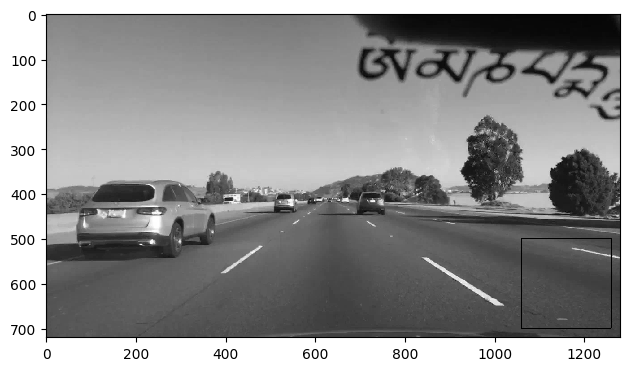

In [90]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
    arr = np.concatenate((np.array(im.ravel()),np.array(fd)))
    
    pred = model7.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:]
    imshow(clone)
    plt.pause(0.001) 
    display.clear_output(wait=True)


C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


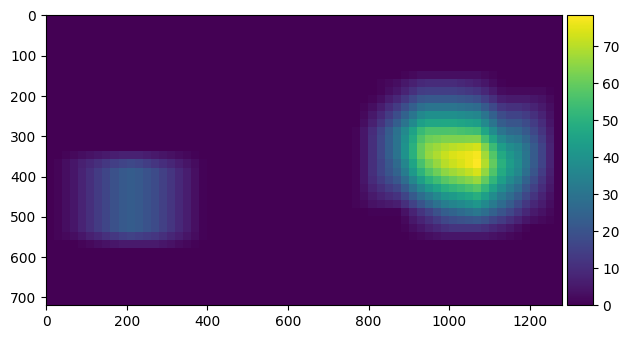

In [91]:
imshow(heatmap/10)

In [92]:
image_to_test = cv2.imread('./img3_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2GRAY)


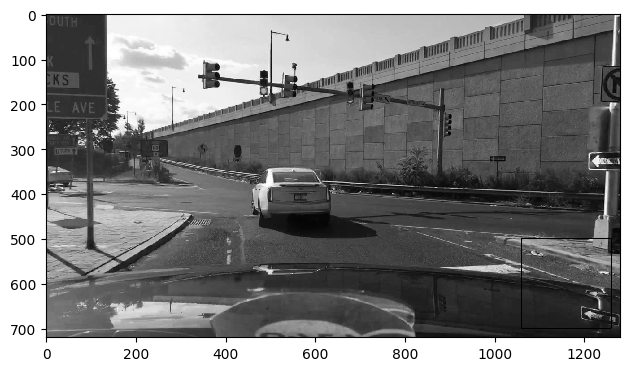

In [94]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
    arr = np.concatenate((np.array(im.ravel()),np.array(fd)))
    
    pred = model7.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:]
    imshow(clone)
    plt.pause(0.001) 
    display.clear_output(wait=True)


C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


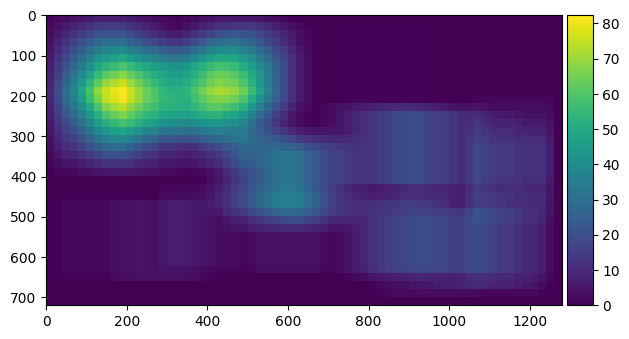

In [95]:
imshow(heatmap/10)

In [99]:
def process_images_from_folder_HOG_only_gr(folder_path):
    image_vectors = []
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for file_name in file_names:
        file_path = os.path.join(folder_path, file_name)
        try:
            image = imread(file_path)
            image = cv2.resize(image, (64,64))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY )
            #print(image.ravel().shape)
            fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
            d = np.array(fd)
            image_vectors.append(d)
        except Exception as e:
            print(f"Ошибка при обработке файла {file_name}: {e}")
            
    return image_vectors


In [101]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './OwnCollection/non-vehicles/'
res_non_vehicle_HOG = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_non_vehicle_HOG += process_images_from_folder_HOG_only_gr(path_using)
res_non_vehicle_HOG

[array([0.04556539, 0.15970539, 0.2972617 , ..., 0.07917846, 0.        ,
        0.        ]),
 array([0.27524694, 0.1491609 , 0.09209738, ..., 0.3537819 , 0.3537819 ,
        0.16992689]),
 array([0.2462163 , 0.08974437, 0.0756791 , ..., 0.27061085, 0.27061085,
        0.25295841]),
 array([0.27626903, 0.21312937, 0.27626903, ..., 0.35590544, 0.15492519,
        0.03742083]),
 array([0.06001316, 0.02548038, 0.0268015 , ..., 0.3803693 , 0.01095815,
        0.00834305]),
 array([0.02627694, 0.00326428, 0.03344104, ..., 0.05408243, 0.14251973,
        0.        ]),
 array([0.25909757, 0.05600429, 0.04678205, ..., 0.22352591, 0.08835638,
        0.        ]),
 array([0.10944481, 0.        , 0.1473469 , ..., 0.01971796, 0.        ,
        0.        ]),
 array([0.02368084, 0.        , 0.        , ..., 0.21771356, 0.16545314,
        0.        ]),
 array([0.35147467, 0.00489163, 0.00549063, ..., 0.01751673, 0.01384819,
        0.01958429]),
 array([0.10763985, 0.07016064, 0.11349855, ..., 0

In [102]:
res_non_vehicle_HOG += process_images_from_folder_HOG_only_gr("./swimseg-2/train/")


In [103]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './OwnCollection/vehicles/'
res_vehicle_HOG = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_vehicle_HOG += process_images_from_folder_HOG_only_gr(path_using)
res_vehicle_HOG

[array([0.16203745, 0.25605689, 0.04906056, ..., 0.        , 0.00771688,
        0.0044123 ]),
 array([0.06584261, 0.24319895, 0.10843637, ..., 0.01244832, 0.0235664 ,
        0.09621189]),
 array([0.26039155, 0.25521606, 0.13020208, ..., 0.00893214, 0.01650554,
        0.00744345]),
 array([0.08551632, 0.0197904 , 0.04380791, ..., 0.00655327, 0.06338034,
        0.17961883]),
 array([0.07784714, 0.03770272, 0.0298905 , ..., 0.02715957, 0.02820692,
        0.10846158]),
 array([0.24813867, 0.24813867, 0.03905632, ..., 0.00719758, 0.02507028,
        0.38323266]),
 array([0.18240874, 0.27308726, 0.13576823, ..., 0.0158967 , 0.02824445,
        0.02114708]),
 array([0.26345945, 0.03993274, 0.03180692, ..., 0.01153749, 0.0465511 ,
        0.22447618]),
 array([0.35006995, 0.12195341, 0.12163552, ..., 0.        , 0.02223117,
        0.08384081]),
 array([0.25285153, 0.29188477, 0.09456365, ..., 0.17704825, 0.        ,
        0.        ]),
 array([0.27289677, 0.16595135, 0.12350063, ..., 0

In [104]:
np.random.shuffle(np.array(res_non_vehicle_HOG))
res_train_HOG = res_vehicle_HOG[:3400] + res_non_vehicle_HOG[:4000]
res_test_HOG = res_vehicle_HOG[-1000:] + res_non_vehicle_HOG[-1000:]

In [105]:
model8 = SVC(kernel='rbf', gamma='scale', C = 5.0,probability=True)
model8.fit(res_train_HOG,y_res_HOG)

SVC(C=5.0, probability=True)

In [106]:
image_to_test = cv2.imread('./img1_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2GRAY)

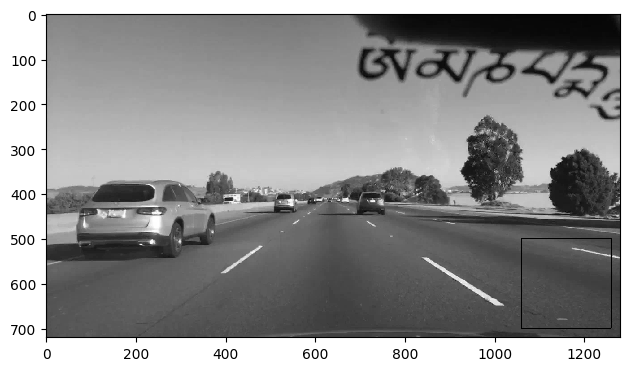

In [108]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
    arr = fd
    
    pred = model8.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:]
    imshow(clone)
    plt.pause(0.001) 
    display.clear_output(wait=True)


C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


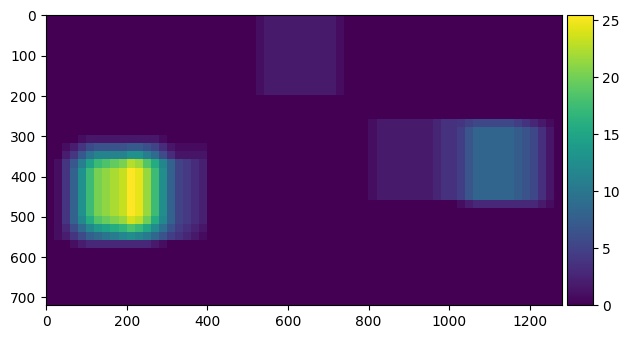

In [109]:
imshow(heatmap/10)

In [110]:
image_to_test = cv2.imread('./img3_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2GRAY)


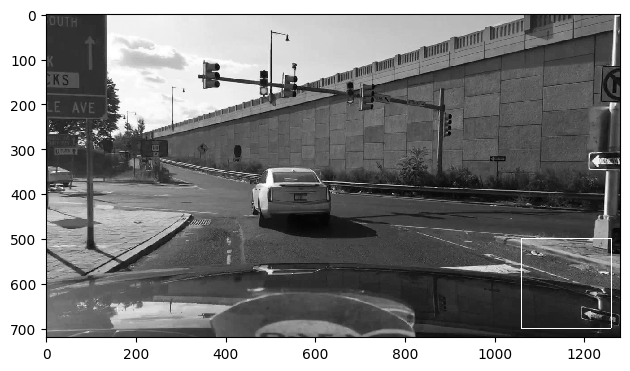

In [111]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
    arr = fd
    
    pred = model8.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:]
    imshow(clone)
    plt.pause(0.001) 
    display.clear_output(wait=True)


C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


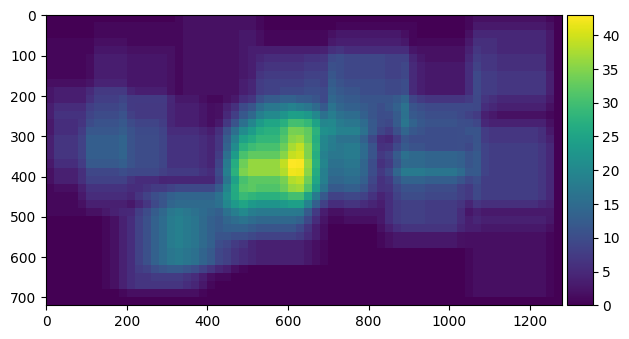

In [112]:
imshow(heatmap/10)

In [115]:
image_to_test = cv2.imread('./img2_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2GRAY)

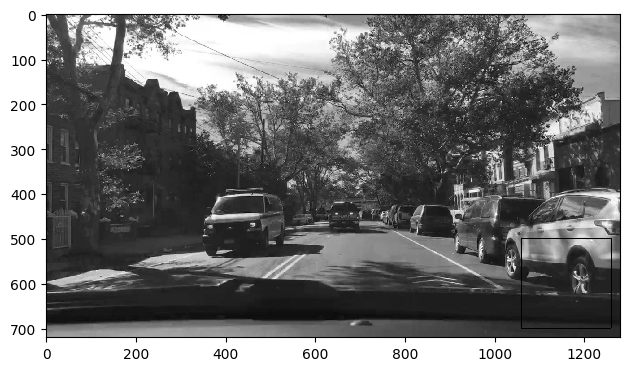

In [116]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
    arr = fd
    
    pred = model8.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:]
    imshow(clone)
    plt.pause(0.001) 
    display.clear_output(wait=True)


C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


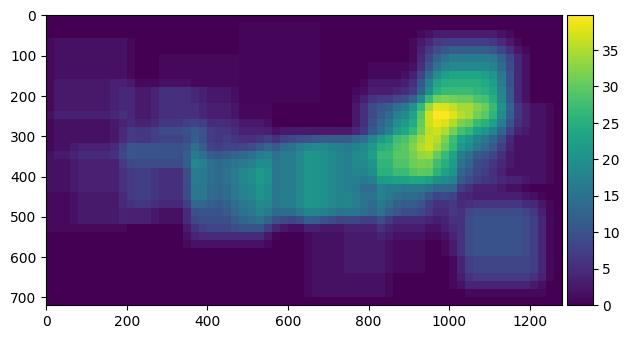

In [117]:
imshow(heatmap/10)

In [118]:
image_to_test = cv2.imread('./img4_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2GRAY)

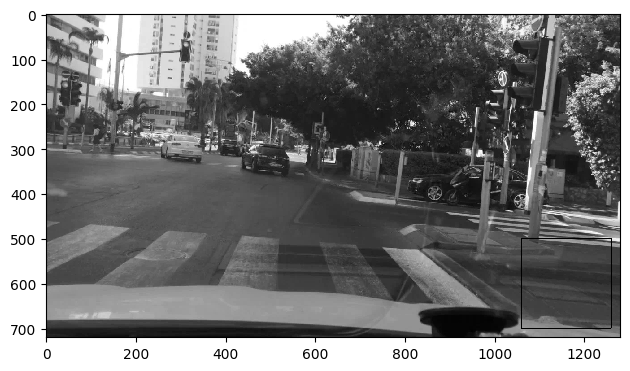

In [119]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
    arr = fd
    
    pred = model8.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:]
    imshow(clone)
    plt.pause(0.001) 
    display.clear_output(wait=True)


C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


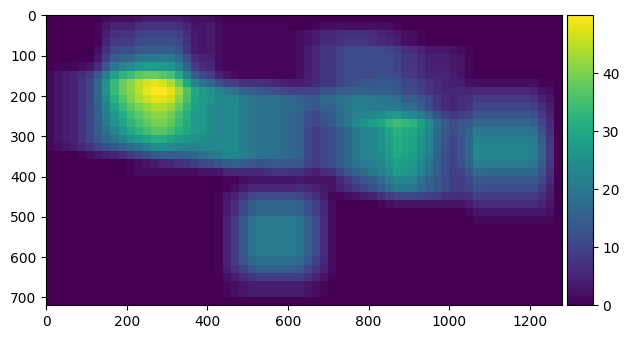

In [120]:
imshow(heatmap/10)

In [154]:
image_to_test = cv2.imread('./img5_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2GRAY)

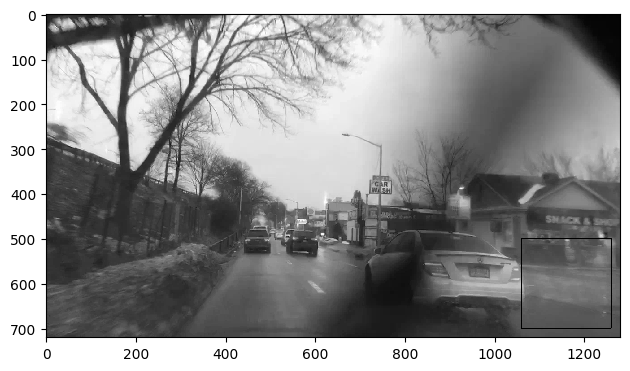

In [155]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
    arr = fd
    
    pred = model8.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:]
    imshow(clone)
    plt.pause(0.001) 
    display.clear_output(wait=True)


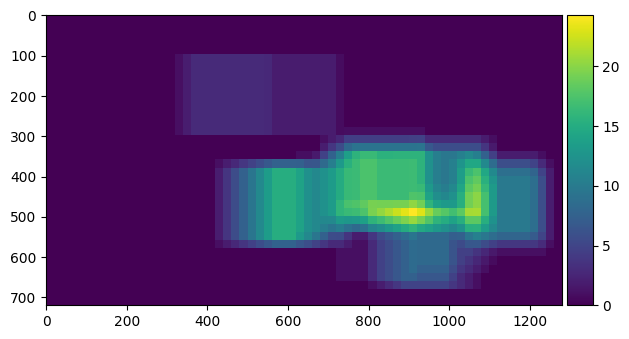

In [157]:
imshow(heatmap/10)

In [215]:
image_to_test = cv2.imread('./img6_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_BGR2GRAY)

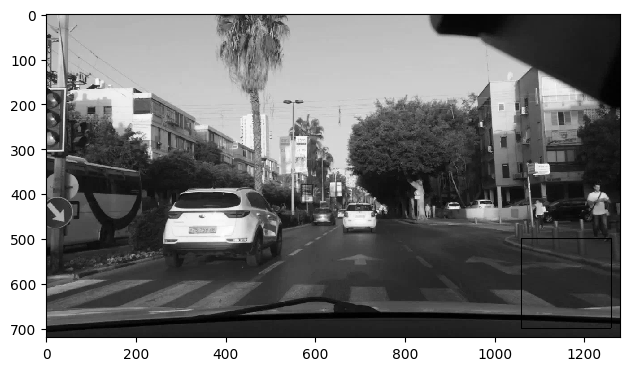

In [216]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True)
            #d = np.concatenate(image.ravel(),fd)
    arr = fd
    
    pred = model8.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:]
    imshow(clone)
    plt.pause(0.001) 
    display.clear_output(wait=True)


C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


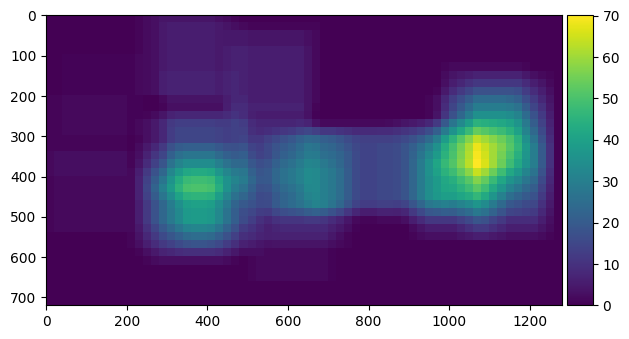

In [217]:
imshow(heatmap/10)

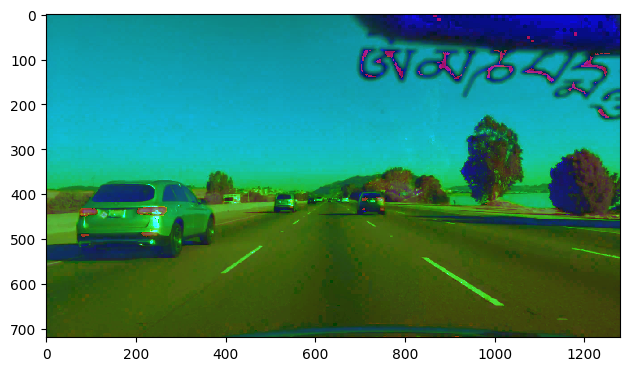

In [143]:
image_to_test = cv2.imread('./img1_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_RGB2HLS)
imshow(image_rgb)

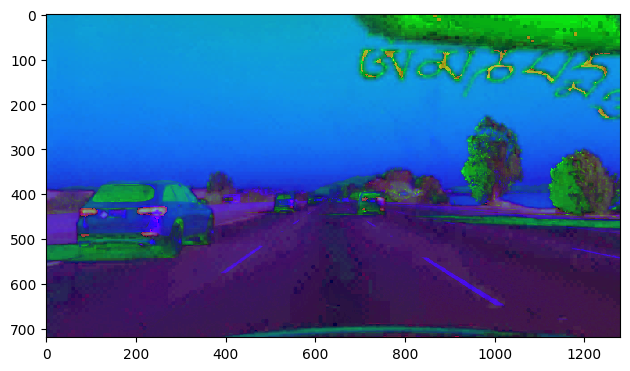

In [144]:
image_to_test = cv2.imread('./img1_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_RGB2HSV)
imshow(image_rgb)

In [129]:
def process_images_from_folder_HOG_only_HSV(folder_path):
    image_vectors = []
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for file_name in file_names:
        file_path = os.path.join(folder_path, file_name)
        try:
            image = imread(file_path)
            image = cv2.resize(image, (64,64))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV )
            #print(image.ravel().shape)
            fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True,channel_axis = 2)
            #d = np.concatenate(image.ravel(),fd)
            d = np.array(fd)
            image_vectors.append(d)
        except Exception as e:
            print(f"Ошибка при обработке файла {file_name}: {e}")
            
    return image_vectors


In [134]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './OwnCollection/non-vehicles/'
res_non_vehicle_HOG = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_non_vehicle_HOG += process_images_from_folder_HOG_only_HSV(path_using)
res_non_vehicle_HOG

[array([0.25409111, 0.03614238, 0.14236488, ..., 0.04998039, 0.08646249,
        0.03878565]),
 array([0.24747588, 0.13256071, 0.11401577, ..., 0.31542132, 0.31542132,
        0.14262129]),
 array([0.31180559, 0.05432852, 0.00811138, ..., 0.13647369, 0.07008149,
        0.16696263]),
 array([0.3500211 , 0.10791781, 0.19355802, ..., 0.3515616 , 0.18755667,
        0.        ]),
 array([0.28225699, 0.22486824, 0.03533978, ..., 0.37782402, 0.00584919,
        0.01241784]),
 array([0.08290459, 0.00519434, 0.03508812, ..., 0.07701186, 0.04544414,
        0.04920107]),
 array([0.15835341, 0.0904972 , 0.04955133, ..., 0.03443237, 0.        ,
        0.06169451]),
 array([0.12745484, 0.        , 0.17391391, ..., 0.1731601 , 0.10955743,
        0.05653941]),
 array([0.11044925, 0.06086785, 0.2116992 , ..., 0.21400161, 0.16543659,
        0.        ]),
 array([0.39319879, 0.00238813, 0.01606228, ..., 0.02245993, 0.01159943,
        0.01640407]),
 array([0.0995786 , 0.0636816 , 0.11921963, ..., 0

In [135]:
res_non_vehicle_HOG += process_images_from_folder_HOG_only_HSV("./swimseg-2/train/")

In [136]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './OwnCollection/vehicles/'
res_vehicle_HOG = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_vehicle_HOG += process_images_from_folder_HOG_only_HSV(path_using)
res_vehicle_HOG

[array([0.10684263, 0.08099562, 0.06557134, ..., 0.        , 0.00763714,
        0.0043667 ]),
 array([0.04921528, 0.09891794, 0.06337757, ..., 0.02731568, 0.0293888 ,
        0.16435596]),
 array([0.3439984 , 0.11725962, 0.25290072, ..., 0.        , 0.01051296,
        0.        ]),
 array([0.18718723, 0.00871527, 0.10345095, ..., 0.        , 0.12337778,
        0.06001472]),
 array([0.11500324, 0.23252638, 0.19143844, ..., 0.02124393, 0.0372582 ,
        0.10139889]),
 array([0.23814498, 0.15195194, 0.        , ..., 0.        , 0.04554847,
        0.37472069]),
 array([0.18141589, 0.28498673, 0.183172  , ..., 0.03562533, 0.05472954,
        0.03632904]),
 array([0.23734202, 0.03246653, 0.01656997, ..., 0.        , 0.07653589,
        0.1990254 ]),
 array([0.30473603, 0.29102708, 0.23738551, ..., 0.        , 0.        ,
        0.08815165]),
 array([0.2812471 , 0.23224989, 0.20108823, ..., 0.10783808, 0.03289627,
        0.        ]),
 array([0.27099867, 0.10909876, 0.12382668, ..., 0

In [137]:
np.random.shuffle(np.array(res_non_vehicle_HOG))
res_train_HOG = res_vehicle_HOG[:3400] + res_non_vehicle_HOG[:4000]
res_test_HOG = res_vehicle_HOG[-1000:] + res_non_vehicle_HOG[-1000:]

In [138]:
model9 = SVC(kernel='rbf', gamma='scale', C = 5.0,probability=True)
model9.fit(res_train_HOG,y_res_HOG)

SVC(C=5.0, probability=True)

In [139]:
image_to_test = cv2.imread('./img1_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_RGB2HSV)

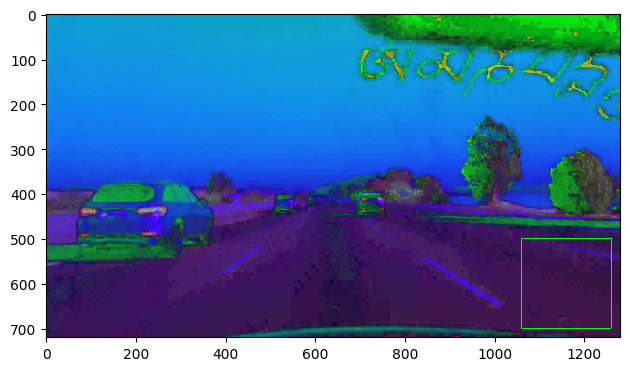

In [141]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True,channel_axis = 2)
            #d = np.concatenate(image.ravel(),fd)
    arr = fd
    
    pred = model9.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255,0,0)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0,255,0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:,::1]
    imshow(clone)
    plt.pause(0.00001) 
    display.clear_output(wait=True)


C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


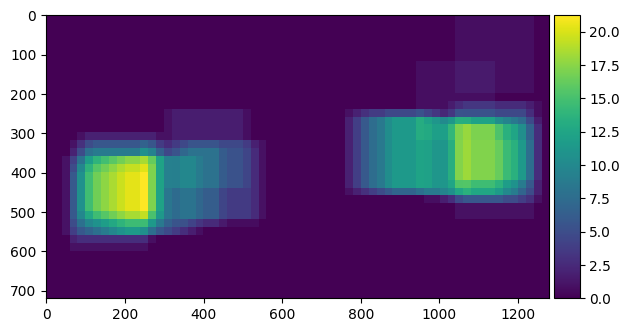

In [142]:
imshow(heatmap/10)

In [145]:
def process_images_from_folder_with_HOGs_HSV(folder_path):
    image_vectors = []
    file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    
    for file_name in file_names:
        file_path = os.path.join(folder_path, file_name)
        try:
            image = imread(file_path)
            image = cv2.resize(image, (64,64))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV )
            #print(image.ravel().shape)
            fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True,channel_axis = 2)
            #d = np.concatenate(image.ravel(),fd)
            d = np.concatenate((np.array(image.ravel()),np.array(fd)))
            image_vectors.append(d)
        except Exception as e:
            print(f"Ошибка при обработке файла {file_name}: {e}")
            
    return image_vectors


In [146]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './OwnCollection/non-vehicles/'
res_non_vehicle_HOG = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_non_vehicle_HOG += process_images_from_folder_with_HOGs_HSV(path_using)
res_non_vehicle_HOG

[array([6.80000000e+01, 2.30000000e+01, 1.32000000e+02, ...,
        4.99803930e-02, 8.64624862e-02, 3.87856458e-02]),
 array([49.        , 23.        , 88.        , ...,  0.31542132,
         0.31542132,  0.14262129]),
 array([5.70000000e+01, 2.10000000e+01, 1.23000000e+02, ...,
        1.36473685e-01, 7.00814854e-02, 1.66962627e-01]),
 array([170.        ,  10.        ,  80.        , ...,   0.3515616 ,
          0.18755667,   0.        ]),
 array([6.30000000e+01, 3.00000000e+01, 7.70000000e+01, ...,
        3.77824019e-01, 5.84918741e-03, 1.24178439e-02]),
 array([4.50000000e+01, 3.10000000e+01, 1.15000000e+02, ...,
        7.70118632e-02, 4.54441358e-02, 4.92010743e-02]),
 array([5.30000000e+01, 3.60000000e+01, 9.30000000e+01, ...,
        3.44323675e-02, 0.00000000e+00, 6.16945060e-02]),
 array([7.40000000e+01, 3.10000000e+01, 1.57000000e+02, ...,
        1.73160098e-01, 1.09557434e-01, 5.65394066e-02]),
 array([84.        , 79.        , 68.        , ...,  0.21400161,
         0.16

In [147]:
res_non_vehicle_HOG += process_images_from_folder_with_HOGs_HSV("./swimseg-2/train/")

In [148]:
view = {0 : 'Far', 1 : 'Left', 2 : 'MiddleClose', 3 : 'Right'}
path = './OwnCollection/vehicles/'
res_vehicle_HOG = []
for cls in view:
    path_using = path + view[cls] + '/'
    res_vehicle_HOG += process_images_from_folder_with_HOGs_HSV(path_using)
res_vehicle_HOG

[array([7.80000000e+01, 1.80000000e+01, 1.68000000e+02, ...,
        0.00000000e+00, 7.63714208e-03, 4.36670298e-03]),
 array([7.80000000e+01, 1.80000000e+01, 1.68000000e+02, ...,
        2.73156759e-02, 2.93888011e-02, 1.64355957e-01]),
 array([5.30000000e+01, 2.20000000e+01, 1.53000000e+02, ...,
        0.00000000e+00, 1.05129634e-02, 0.00000000e+00]),
 array([8.50000000e+01, 3.30000000e+01, 9.90000000e+01, ...,
        0.00000000e+00, 1.23377779e-01, 6.00147186e-02]),
 array([7.90000000e+01, 4.00000000e+01, 1.09000000e+02, ...,
        2.12439276e-02, 3.72581954e-02, 1.01398893e-01]),
 array([8.80000000e+01, 4.10000000e+01, 1.00000000e+02, ...,
        0.00000000e+00, 4.55484706e-02, 3.74720695e-01]),
 array([7.00000000e+01, 1.50000000e+01, 1.04000000e+02, ...,
        3.56253332e-02, 5.47295447e-02, 3.63290434e-02]),
 array([8.80000000e+01, 3.40000000e+01, 1.06000000e+02, ...,
        0.00000000e+00, 7.65358864e-02, 1.99025403e-01]),
 array([7.00000000e+01, 8.00000000e+00, 9.200000

In [149]:
np.random.shuffle(np.array(res_non_vehicle_HOG))
res_train_HOG = res_vehicle_HOG[:3400] + res_non_vehicle_HOG[:4000]
res_test_HOG = res_vehicle_HOG[-1000:] + res_non_vehicle_HOG[-1000:]

In [150]:
model10 = SVC(kernel='rbf', gamma='scale', C = 5.0,probability=True)
model10.fit(res_train_HOG,y_res_HOG)

SVC(C=5.0, probability=True)

In [218]:
image_to_test = cv2.imread('./img6_to_test.jpg')
image_rgb = cv2.cvtColor(image_to_test, cv2.COLOR_RGB2HSV)

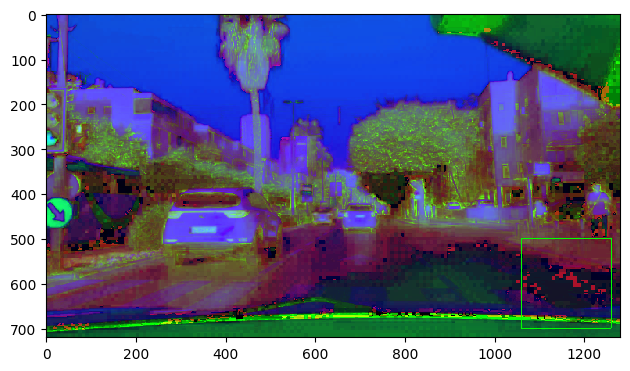

In [219]:
pred_0 = 0
heatmap = np.zeros((720,1280))
for (x, y, window) in sliding_window(image_rgb, (window_w, window_h), 20):
    if window.shape[0] != window_w or window.shape[1] != window_h:
        continue
        
    clone = image_rgb.copy()
    inside = clone[y:y + window_h, x:x + window_w]
    #print(inside.shape)
    im = cv2.resize(inside, (64,64))
    #imshow(im)
    fd, hog_image = hog(im, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True,channel_axis = 2)
            #d = np.concatenate(image.ravel(),fd)
    arr = np.concatenate((np.array(im.ravel()),np.array(fd)))
    
    pred = model10.predict_proba([arr])
    #print(pred)
    if pred[0][1] > 0.7 and pred_0 > 0.9 or pred[0][1] > 0.95:
        color = (255,0,0)
        heatmap[y:y + window_h, x:x + window_w] += 10*pred[0][1]
    else:
        color = (0,255,0)
    pred_0 = pred[0][1]
    #pred = model3.predict([arr])
    #if pred[0] == 1:
       # color = (255,0,0)
       # heatmap[y:y + window_h, x:x + window_w] += 10
   # else:
    #    color = (0,255,0)
    cv2.rectangle(clone, (x, y), (x + window_w, y + window_h), color, 2)
    clone = clone[:,:,::1]
    imshow(clone)
    plt.pause(0.00001) 
    display.clear_output(wait=True)


C:\Users\fedbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


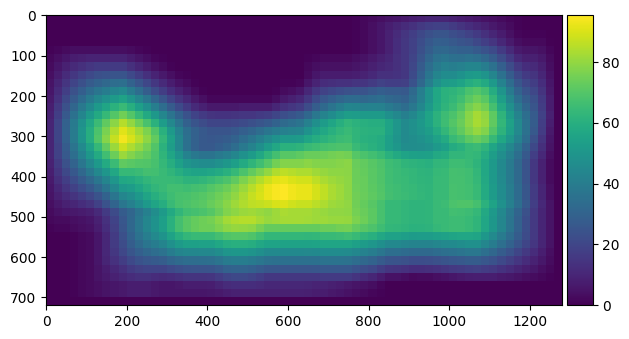

In [220]:
imshow(heatmap/10)